In [1]:
#PI-211, Turevskyi D.V., Variant: 15 (Low,Volume, stripplot,boxenplot)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('shiba_inu_usd.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-01,0.0,0.0,0.0,0.0,0.0,1604789
1,2020-08-02,0.0,0.0,0.0,0.0,0.0,193098
2,2020-08-03,0.0,0.0,0.0,0.0,0.0,129225
3,2020-08-04,0.0,0.0,0.0,0.0,0.0,19717
4,2020-08-05,0.0,0.0,0.0,0.0,0.0,26869


In [2]:
v_class = []
v_mean = df.Volume.mean()
for v in df['Volume']:
    if v + v * 0.2 > v_mean > v - v * 0.2:
        v_class.append('Avg_V')
    elif v - v * 0.2 < v_mean:
        v_class.append('Low_V')
    else:
        v_class.append('High_V')
df['volume_class'] = v_class
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,volume_class
0,2020-08-01,0.0,0.0,0.0,0.0,0.0,1604789,Low_V
1,2020-08-02,0.0,0.0,0.0,0.0,0.0,193098,Low_V
2,2020-08-03,0.0,0.0,0.0,0.0,0.0,129225,Low_V
3,2020-08-04,0.0,0.0,0.0,0.0,0.0,19717,Low_V
4,2020-08-05,0.0,0.0,0.0,0.0,0.0,26869,Low_V


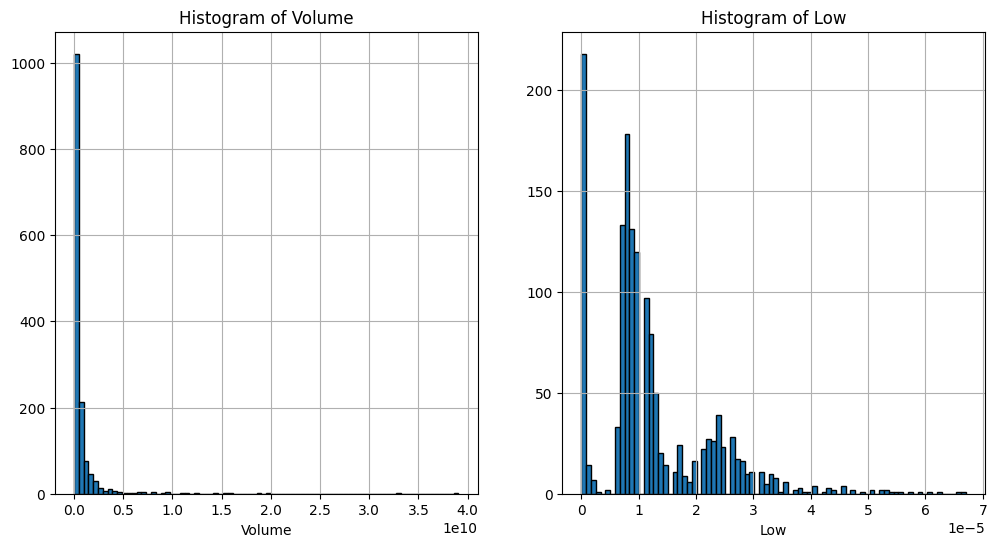

In [3]:
# histogram
fig = plt.figure(figsize = (12,6))
vol = fig.add_subplot(121)
low = fig.add_subplot(122)

vol.hist(df.Volume, bins = 80, edgecolor='black')
vol.set_xlabel('Volume')
vol.set_title('Histogram of Volume')
vol.grid(True)

low.hist(df.Low, bins = 80, edgecolor='black')
low.set_xlabel('Low')
low.set_title('Histogram of Low')
low.grid(True)
plt.show()



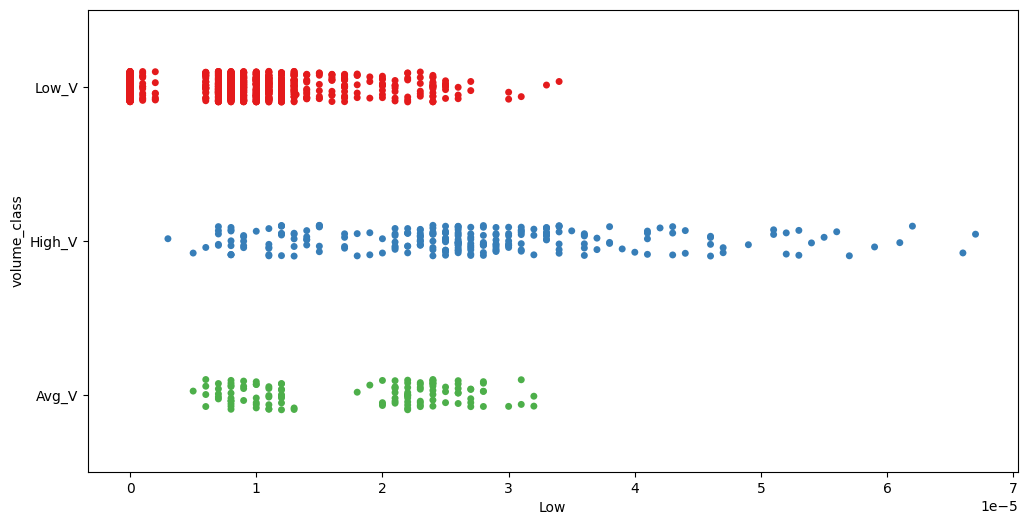

In [4]:
# stripplot
plt.figure(figsize=(12,6))
sns.stripplot(data = df, x = 'Low', y = 'volume_class', hue = 'volume_class',  jitter=True, palette = 'Set1', legend=False)
plt.show()

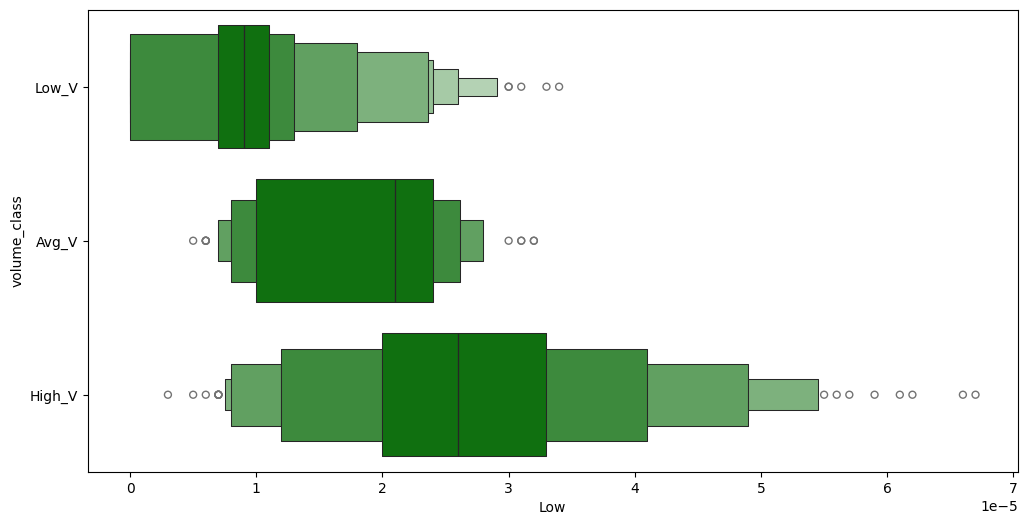

In [5]:
# boxenplot
plt.figure(figsize=(12,6))
rank = ['Low_V','Avg_V','High_V']
sns.boxenplot(x = 'Low', y = 'volume_class',
              color = 'g', order = rank,
              width_method = 'linear', data = df)
plt.show()